# Loading libraries and Dataset

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt             
from sklearn.model_selection import train_test_split          
from sklearn.metrics import accuracy_score                
from sklearn.metrics import roc_auc_score                       
from sklearn.metrics import confusion_matrix, classification_report     
from sklearn.model_selection import cross_val_score                      
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [28]:
# Replace 'zomato.csv' with the correct file path if needed
file_path = 'zomato.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

In [29]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [31]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [32]:
df.shape

(9551, 21)

In [33]:
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [34]:
## Checking if dataset contains any null

nan_values = df.isna()
nan_columns = nan_values.any()

columns_with_nan = df.columns[nan_columns].tolist()
print(columns_with_nan)

['Cuisines']


#### Cuisines seem to contain null values. Hence any further analysis involving Cuisines the NaN values has to be considered.



#### There is another file that is also available along with this dataset

In [35]:
df1 = pd.read_excel('country_code.xlsx')
df1.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


#### Let us merge both datasets. This will help us to understand the dataset country-wise.

In [36]:
df2 = pd.merge(df,df1,on='Country Code',how='left')
df2.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


# Exploratory Analysis and Visualization

#### List of countries the survey is spread across

In [37]:
print('List of counteris the survey is spread accross - ')
for x in pd.unique(df2.Country): print(x)
print()
print('Total number to country', len(pd.unique(df2.Country)))

List of counteris the survey is spread accross - 
Phillipines
Brazil
United States
Australia
Canada
Singapore
UAE
India
Indonesia
New Zealand
United Kingdom
Qatar
South Africa
Sri Lanka
Turkey

Total number to country 15


#### The survey seems to have spread across15 countries. This shows that Zomato is a multinational company having actives business in all those countries.

In [38]:
from plotly.offline import init_notebook_mode, plot, iplot

labels = list(df2.Country.value_counts().index)
values = list(df2.Country.value_counts().values)

fig = {
    "data":[
        {
            "labels" : labels,
            "values" : values,
            "hoverinfo" : 'label+percent',
            "domain": {"x": [0, .9]},
            "hole" : 0.6,
            "type" : "pie",
            "rotation":120,
        },
    ],
    "layout": {
        "title" : "Zomato's Presence around the World",
        "annotations": [
            {
                "font": {"size":20},
                "showarrow": True,
                "text": "Countries",
                "x":0.2,
                "y":0.9,
            },
        ]
    }
}

iplot(fig)

#### As Zomato is a startup from India hence it makes sense that it has maximum business spread across restaurants in India

#### Understanding the Rating aggregate, color, and text

In [39]:
df3 = df2.groupby(['Aggregate rating','Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
df3
df3

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


#### The above information helps us to understand the relation between Aggregate rating, color, and text. We conclude the following color assigned to the ratings:

In [40]:
'''Rating 0 — White — Not rated
Rating 1.8 to 2.4 — Red — Poor
Rating 2.5 to 3.4 — Orange — Average
Rating 3.5 to 3.9 — Yellow — Good
Rating 4.0 to 4.4 — Green — Very Good
Rating 4.5 to 4.9 — Dark Green — Excellent
Let us try to understand the spread of rating across restaurants'''

'Rating 0 — White — Not rated\nRating 1.8 to 2.4 — Red — Poor\nRating 2.5 to 3.4 — Orange — Average\nRating 3.5 to 3.9 — Yellow — Good\nRating 4.0 to 4.4 — Green — Very Good\nRating 4.5 to 4.9 — Dark Green — Excellent\nLet us try to understand the spread of rating across restaurants'

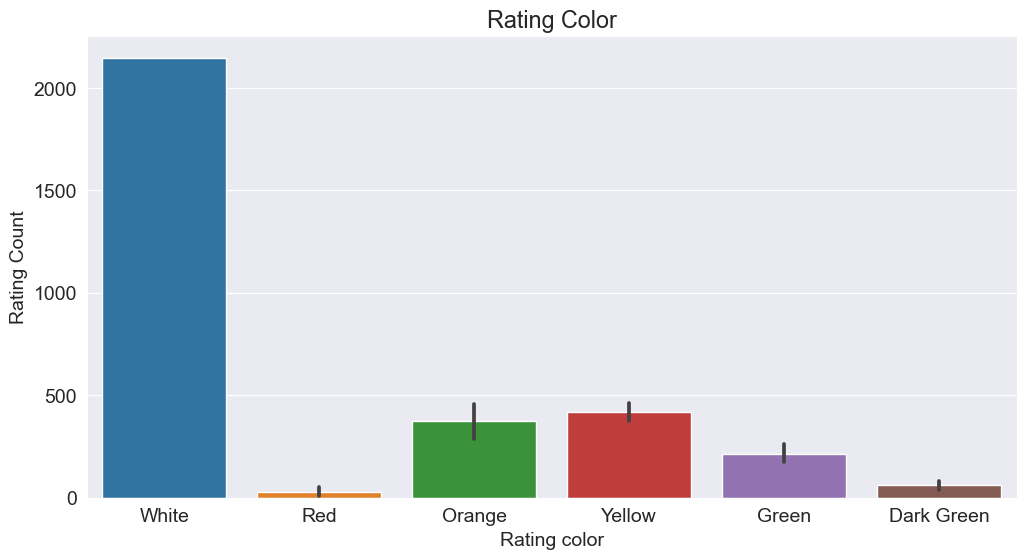

In [41]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

plt.figure(figsize=(12,6))
# plt.xticks(rotation=75)
plt.title('Rating Color')
sns.barplot(x=df3['Rating color'], y=df3['Rating Count']);

#### Interesting, Maximum restaurants seems to have gone No ratings. Let us check if these restaurants belong to some specific country.

In [42]:
No_rating = df2[df2['Rating color']=='White'].groupby('Country').size().reset_index().rename(columns={0:'Rating Count'})
No_rating

,Country,Rating Count
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


#### India seems to have maximum unrated restaurants. In India the culture of ordering online food is still gaining momentum hence most of the restaurants are still unrated on Zomato as people might be preferring to visiting the restaurant for a meal.

#### Country and Currency

In [43]:
country_currency = df2[['Country','Currency']].groupby(['Country','Currency']).size().reset_index(name='count').drop('count', axis=1, inplace=False)
country_currency.sort_values('Currency').reset_index(drop=True)

,Country,Currency
0,Phillipines,Botswana Pula(P)
1,Brazil,Brazilian Real(R$)
2,Australia,Dollar($)
3,Canada,Dollar($)
4,Singapore,Dollar($)
5,United States,Dollar($)
6,UAE,Emirati Diram(AED)
7,India,Indian Rupees(Rs.)
8,Indonesia,Indonesian Rupiah(IDR)
9,New Zealand,NewZealand($)


#### Above table display country and the currency they accept. Interestingly four countries seems to be accepting currency in dollars.

#### Online delivery distribution

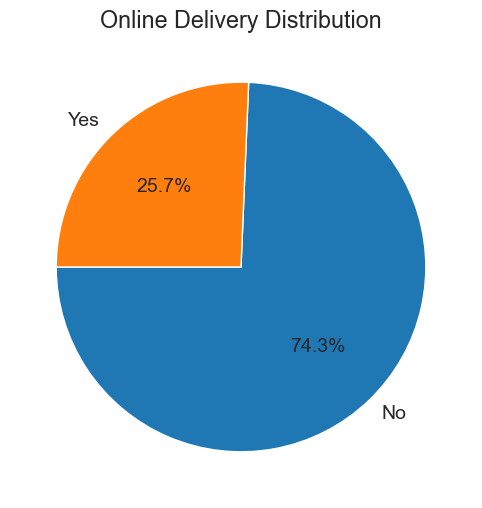

In [44]:
plt.figure(figsize=(12,6))
plt.title('Online Delivery Distribution')
plt.pie(df2['Has Online delivery'].value_counts()/9551*100, labels=df2['Has Online delivery'].value_counts().index, autopct='%1.1f%%', startangle=180);

#### Only 25% of restaurants accept online delivery. This data might be biased as we have the maximum number of restaurants listed here are from India. Maybe analysis over city-wise would be more helpful.

#### Let us try to understand the coverage of the city

In [45]:
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
plt.figure(figsize=(12,6))
# import plotly.plotly as py

labels = list(df2.City.value_counts().head(20).index)
values = list(df2.City.value_counts().head(20).values)

fig = {
    "data":[
        {
            "labels" : labels,
            "values" : values,
            "hoverinfo" : 'label+percent',
            "domain": {"x": [0, .9]},
            "hole" : 0.6,
            "type" : "pie",
            "rotation":120,
        },
    ],
    "layout": {
        "title" : "Zomato's Presence Citywise",
        "annotations": [
            {
                "font": {"size":20},
                "showarrow": True,
                "text": "Cities",
                "x":0.2,
                "y":0.9,
            },
        ]
    }
}
iplot(fig);

<Figure size 1200x600 with 0 Axes>

#### The data seems to be skewed towards New Delhi, Gurgaon, and Noida. I see minimal data for other cities. Hence I would do my analysis predominantly on New Delhi.

#### We’ve already gained several insights about the restaurants present in the survey. Let’s ask some specific questions and try to answer them using data frame operations and visualizations.

### Locality maximum hotels are listed in Zomato

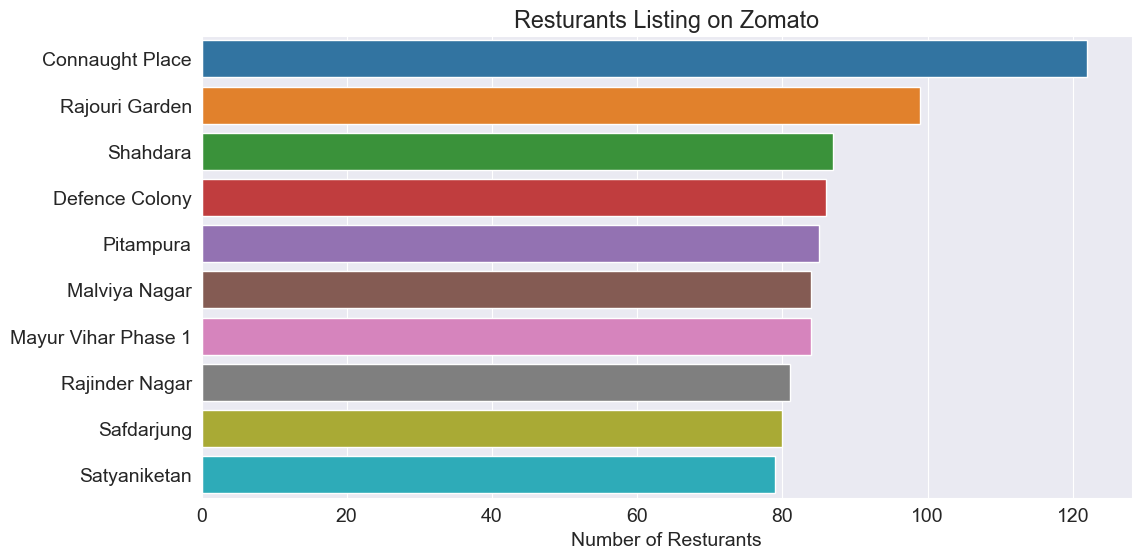

In [46]:
Delhi = df2[(df2.City == 'New Delhi')]
plt.figure(figsize=(12,6))
sns.barplot(x=Delhi.Locality.value_counts().head(10), y=Delhi.Locality.value_counts().head(10).index)

plt.ylabel(None);
plt.xlabel('Number of Resturants')
plt.title('Resturants Listing on Zomato');

#### Connaught place seems to have a high no of restaurants registered with Zomato, Let us understand the cuisines the top-rated restaurants have to offer

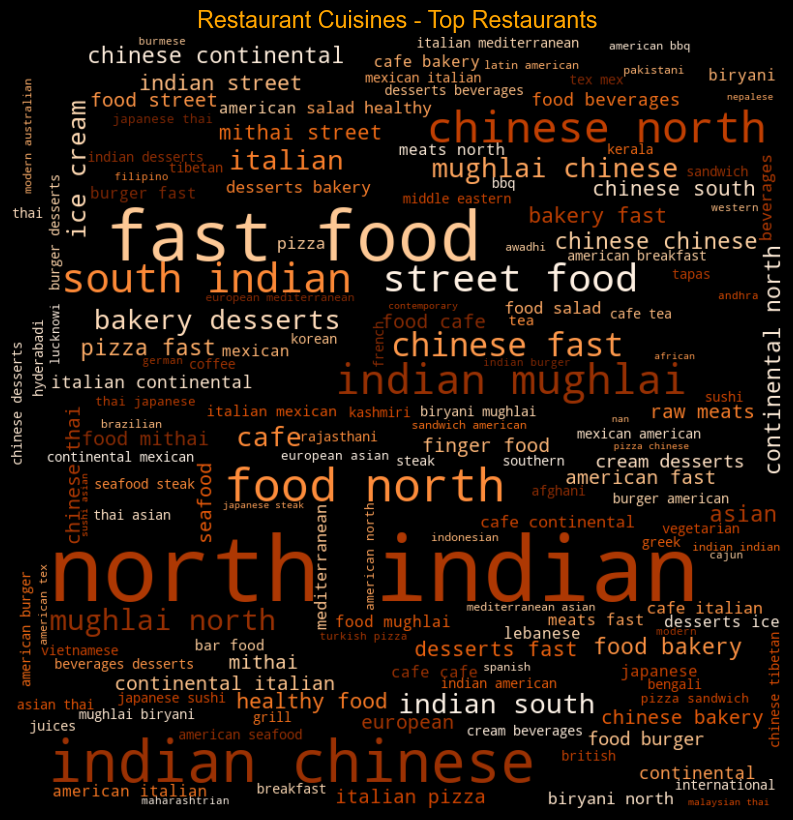

In [48]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

comment_words = ''
stopwords = set(STOPWORDS)

# Replace 'cuisien' with the actual column containing cuisines in your DataFrame
# For example, if your DataFrame is 'df' and the column is 'Cuisines', use df['Cuisines']
cuisien = df['Cuisines']

# iterate through the cuisien column
for val in cuisien:
    # typecast each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens) + " "

wordcloud = WordCloud(width=800, height=800,
                      background_color='black',  # Dark background
                      colormap='Oranges',  # Orange color
                      stopwords=stopwords,
                      min_font_size=10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize=(8, 8), facecolor='k')  # Black background
plt.title('Restaurant Cuisines - Top Restaurants', color='orange')  # Orange title
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()


### restaurants which accept online delivery

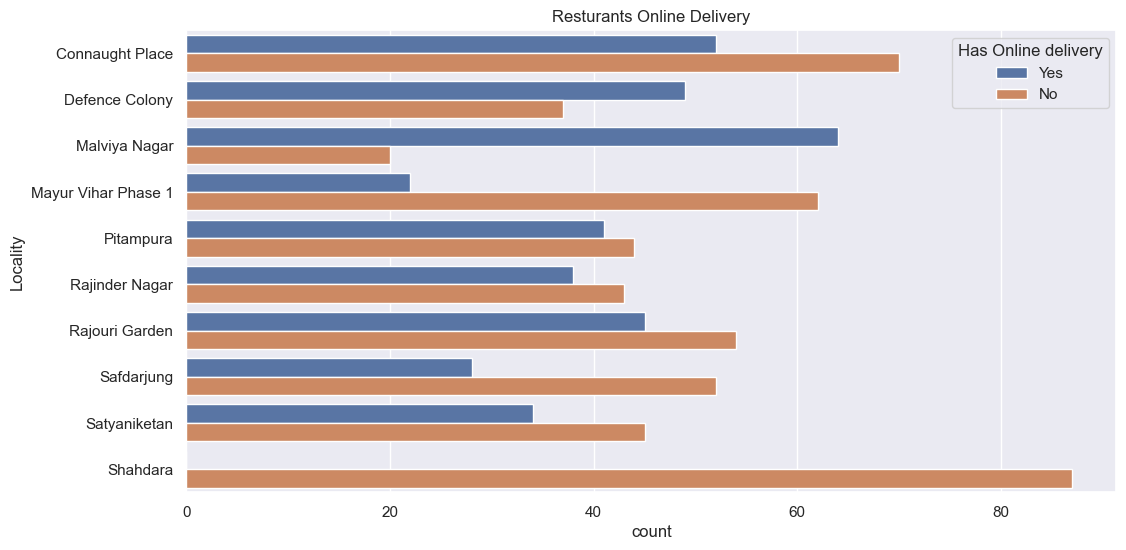

In [49]:
top_locality = Delhi.Locality.value_counts().head(10)
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12,6))
ax = sns.countplot(y= "Locality", hue="Has Online delivery", data=Delhi[Delhi.Locality.isin(top_locality.index)])
plt.title('Resturants Online Delivery');

#### Apart from Shahdara locality, restaurants in other localities accept online delivery.

#### Online Delivery seems to be on the higher side in Defence colony and Malviya Nagar

### Rating VS Cost of dinning

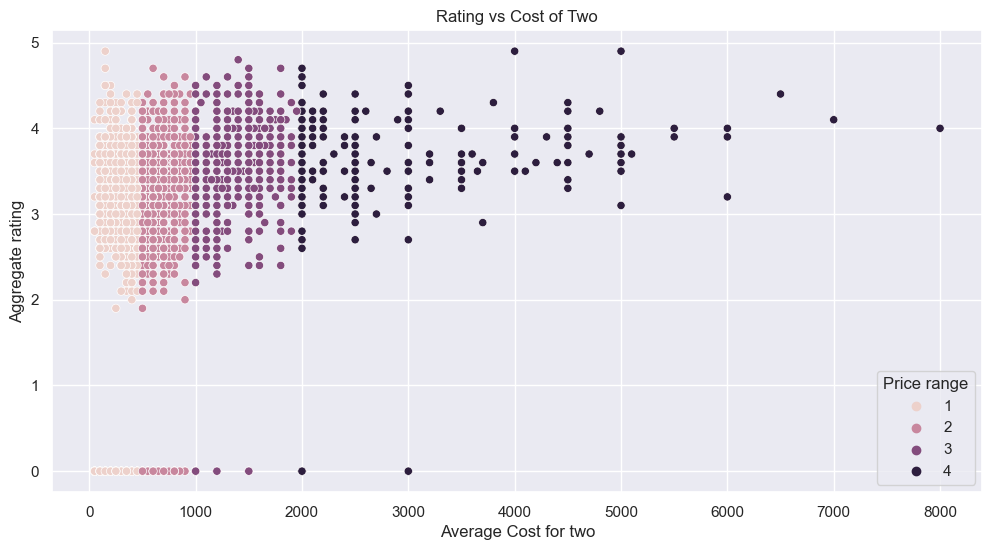

In [50]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="Average Cost for two", y="Aggregate rating", hue='Price range', data=Delhi)

plt.xlabel("Average Cost for two")
plt.ylabel("Aggregate rating")
plt.title('Rating vs Cost of Two');

#### I observe there is no linear relation between price and rating. For instance, Restaurants with good rating (like 4–5) have restaurants with all the price range and spread across the entire X axis

### Location of Highly rated restaurants across New Delhi

In [58]:
Delhi['Rating text'].value_counts()

Average      2495
Not rated    1425
Good         1128
Very Good     300
Poor           97
Excellent      28
Name: Rating text, dtype: int64

In [61]:
import plotly.express as px
Highly_rated = Delhi[Delhi['Rating text'].isin(['Excellent'])]

fig = px.scatter_mapbox(Highly_rated, lat="Latitude", lon="Longitude", hover_name="City", hover_data=["Aggregate rating", "Restaurant Name"],
                        color_discrete_sequence=["fuchsia"], zoom=10, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_layout(title='Highle rated Resturants Location',
                  autosize=True,
                  hovermode='closest',
                  showlegend=False)
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,)

fig.show()

#### The aforementioned four cities represent nearly 65% of the total data available in the dataset. Apart from the higly rated local restaurants, it’d be intersting to know where the known-eateries that are commonplace. The verticles across which these can be located are -



### Breakfast and Coffee locations

In [62]:
types = {
    "Breakfast and Coffee" : ["Cafe Coffee Day", "Starbucks", "Barista", "Costa Coffee", "Chaayos", "Dunkin' Donuts"],
    "American": ["Domino's Pizza", "McDonald's", "Burger King", "Subway", "Dunkin' Donuts", "Pizza Hut"],
    "Ice Creams and Shakes": ["Keventers", "Giani", "Giani's", "Starbucks", "Baskin Robbins", "Nirula's Ice Cream"]
}

breakfast = Delhi[Delhi['Restaurant Name'].isin(types['Breakfast and Coffee'])]
american = Delhi[Delhi['Restaurant Name'].isin(types['American'])]
ice_cream = Delhi[Delhi['Restaurant Name'].isin(types['Ice Creams and Shakes'])]

In [63]:
breakfast = breakfast[['Restaurant Name','Aggregate rating']].groupby('Restaurant Name').mean().reset_index().sort_values('Aggregate rating',ascending=False).reset_index()
breakfast.drop("index",axis=1)

,Restaurant Name,Aggregate rating
0,Chaayos,3.812500
1,Starbucks,3.750000
2,Costa Coffee,3.450000
3,Barista,3.325000
4,Dunkin' Donuts,3.300000
5,Cafe Coffee Day,2.573684


In [64]:
import plotly.express as px

df= breakfast
fig = px.bar(df, y='Aggregate rating', x='Restaurant Name', text='Aggregate rating', title="Breakfast and Coffee locations")
fig.update_traces(texttemplate='%{text:.3s}', textposition='outside')
fig.update_layout(
    autosize=False,
    width=800,
    height=500,)
fig.show()

#### Chaayos outlets are doing better. We need more of those in Delhi. Café coffee day seems to be performing poorly in avg rating. They are required to improve their services.

### Fast Food Restaurants

In [65]:
american = american[['Restaurant Name','Aggregate rating']].groupby('Restaurant Name').mean().reset_index().sort_values('Aggregate rating',ascending=False)
american

,Restaurant Name,Aggregate rating
0,Burger King,3.477778
3,McDonald's,3.445455
2,Dunkin' Donuts,3.300000
4,Pizza Hut,3.158333
5,Subway,3.047368
1,Domino's Pizza,2.794545


In [66]:
import plotly.express as px

df= american
fig = px.bar(df, y='Aggregate rating', x='Restaurant Name', text='Aggregate rating', title="Fast Food Resturants")
fig.update_traces(texttemplate='%{text:.3s}', textposition='outside')
fig.update_layout(
    autosize=False,
    width=800,
    height=500,)

fig.show()

### Ice Cream Parlors

In [67]:
ice_cream = ice_cream[['Restaurant Name','Aggregate rating']].groupby('Restaurant Name').mean().reset_index().sort_values('Aggregate rating',ascending=False)
ice_cream

,Restaurant Name,Aggregate rating
5,Starbucks,3.750000
2,Giani's,3.011765
3,Keventers,2.983333
0,Baskin Robbins,2.769231
1,Giani,2.675000
4,Nirula's Ice Cream,2.400000


In [68]:
import plotly.express as px

df= ice_cream
fig = px.bar(df, y='Aggregate rating', x='Restaurant Name', text='Aggregate rating', title="Ice Cream Parlours")
fig.update_traces(texttemplate='%{text:.3s}', textposition='outside')
fig.update_layout(
    autosize=False,
    width=800,
    height=500,)
fig.show()

#### Foreign brands seems to be doing better than the local brands

## Inferences and Conclusions

#### We’ve drawn many inferences from the survey. Here’s a summary of a few of them:


#### The dataset is skewed towards India and doesn't represent the complete data of restaurants worldwide.

#### Restaurants rating is categorized in categories

In [69]:
'''Not Rated
Average
Good
Very Good
Excellent'''

'Not Rated\nAverage\nGood\nVery Good\nExcellent'

#### Connaught Palace have maximum restaurants listed on Zomato but in terms of online delivery acceptance Defence colony and Malviya nagar seems to be doing better.

#### The top rated restaurants seems to be getting better rating on the following cuisine


In [70]:
'''North Indian
Chinese
American
Italian'''

'North Indian\nChinese\nAmerican\nItalian'

#### There is no relation between cost and rating. Some of the best rated restaurants are low on cost and vice versa.

#### On common Eateries, For Breakfast and Coffee location Indian restaurants seems to be better rated but for Fast food chain and Ice cream parlors American restaurants seems to be doing better.